In [394]:
# Exploratory Data Analysis

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [395]:
# Xgboost

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

In [396]:
# PyTorch computations

#interact with your operating system
import os 
#Needed to create tensors, build neural networks, and train models.
import torch
#jovian is a library for saving and sharing Jupyter Notebooks online.
#import jovian
#Useful for working with images and pre-built models (like ResNet, AlexNet).
import torchvision
#nn has ready-to-use layers (like Linear, Conv2d) to build models easily.
import torch.nn as nn
#Used for loading, cleaning, and manipulating data (especially CSVs and tables).
import pandas as pd
#Useful for numerical operations and working with arrays/matrices.
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.nn.functional as F
#import opendatasets as od
from torch.utils.data import random_split, TensorDataset, DataLoader

In [397]:
insurance_claims = pd.read_csv("insurance_claims.csv")
insurance_claims.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [398]:
insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [399]:
insurance_claims._c39

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: _c39, Length: 1000, dtype: float64

In [400]:
def split_date(df):
  df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
  df['policy_bind_year'] = df.policy_bind_date.dt.year
  df['policy_bind_month'] = df.policy_bind_date.dt.month
  df['policy_bind_day'] = df.policy_bind_date.dt.day
  df['policy_bind_week_of_year'] = df.policy_bind_date.dt.isocalendar().week
  df['incident_date'] = pd.to_datetime(df['incident_date'])
  df['incident_year'] = df.incident_date.dt.year
  df['incident_month'] = df.incident_date.dt.month
  df['incident_day'] = df.incident_date.dt.day
  df['incident_week_of_year'] = df.incident_date.dt.isocalendar().week

In [401]:
split_date(insurance_claims)

In [402]:
insurance_claims.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,fraud_reported,_c39,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_week_of_year,incident_year,incident_month,incident_day,incident_week_of_year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,Y,NaN,2014,10,17,42,2015,1,25,4
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Y,NaN,2006,6,27,26,2015,1,21,4
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,N,NaN,2000,9,6,36,2015,2,22,8
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Y,NaN,1990,5,25,21,2015,1,10,2
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,N,NaN,2014,6,6,23,2015,2,17,8


In [403]:
def incident_time(df):
  df['incident_time'] = 12 * (df.incident_year - df.policy_bind_year) + (df.incident_month - df.policy_bind_month)
  df['incident_time'] = df['incident_time'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [404]:
incident_time(insurance_claims)

In [405]:
insurance_claims.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,_c39,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_week_of_year,incident_year,incident_month,incident_day,incident_week_of_year,incident_time
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,NaN,2014,10,17,42,2015,1,25,4,3
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,2006,6,27,26,2015,1,21,4,103
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NaN,2000,9,6,36,2015,2,22,8,173
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NaN,1990,5,25,21,2015,1,10,2,296
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NaN,2014,6,6,23,2015,2,17,8,8


In [406]:
insurance_claims[['policy_bind_date', 'incident_date', 'incident_time']]

,policy_bind_date,incident_date,incident_time
0,2014-10-17,2015-01-25,3
1,2006-06-27,2015-01-21,103
2,2000-09-06,2015-02-22,173
3,1990-05-25,2015-01-10,296
4,2014-06-06,2015-02-17,8
...,...,...,...
995,1991-07-16,2015-02-22,283
996,2014-01-05,2015-01-24,12
997,2003-02-17,2015-01-23,143
998,2011-11-18,2015-02-26,39


In [407]:
insurance_claims.shape

(1000, 49)

In [408]:
insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [409]:
insurance_claims.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,...,_c39,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_week_of_year,incident_year,incident_month,incident_day,incident_week_of_year,incident_time
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,0.0,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.0,1000.000000
mean,203.954000,38.948000,546238.648000,2002-02-08 04:40:47.999999872,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,...,NaN,2001.604000,6.559000,15.448000,26.715,2015.0,1.496000,14.995000,5.184,155.689000
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,...,NaN,1990.000000,1.000000,1.000000,1.0,2015.0,1.000000,1.000000,1.0,0.000000
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,...,NaN,1995.000000,3.000000,8.000000,13.0,2015.0,1.000000,7.750000,3.0,82.000000
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,...,NaN,2002.000000,7.000000,16.000000,27.0,2015.0,1.000000,15.000000,5.0,153.000000
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,...,NaN,2008.000000,10.000000,23.000000,40.0,2015.0,2.000000,22.000000,7.0,232.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,...,NaN,2015.000000,12.000000,31.000000,53.0,2015.0,3.000000,31.000000,9.0,301.000000
std,115.113174,9.140287,257063.005276,NaN,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,...,NaN,7.360391,3.499824,8.808001,15.293714,0.0,0.523697,8.670995,2.468651,88.267522


In [410]:
insurance_claims.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39', 'policy_bind_year',
       'policy_bind_month', 'policy_bind_day', 'policy_bind_week_of_year',
       'incident_year', 'incident_month', 'incident_day',
       'incident_w

In [411]:
insurance_claims.drop('_c39', axis = 1, inplace = True)

In [412]:
insurance_claims.shape

(1000, 48)

In [413]:
## Check that there are no more missing values in the dataset
insurance_claims.isnull().sum().sum()

np.int64(91)

In [414]:
insurance_claims.incident_type.value_counts()

incident_type
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: count, dtype: int64

In [415]:
#Let's look at the distribution of claims by type i.e. injury, vehicle and property

claims_df = insurance_claims[['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']]
claims_df

,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,71610,6510,13020,52080
1,5070,780,780,3510
2,34650,7700,3850,23100
3,63400,6340,6340,50720
4,6500,1300,650,4550
...,...,...,...,...
995,87200,17440,8720,61040
996,108480,18080,18080,72320
997,67500,7500,7500,52500
998,46980,5220,5220,36540


In [416]:
claims_sum = claims_df.sum()
claims_sum

total_claim_amount    52761940
injury_claim           7433420
property_claim         7399570
vehicle_claim         37928950
dtype: int64

In [417]:
claims_sum[0] == sum(claims_sum[1:])

C:\Users\Ashrit\AppData\Local\Temp\ipykernel_8484\76417827.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  claims_sum[0] == sum(claims_sum[1:])


np.True_

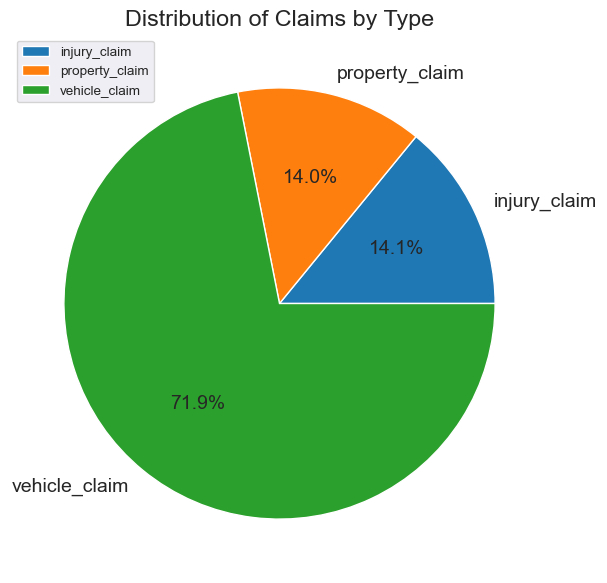

In [418]:
plt.figure(figsize = (12,7))
plt.title('Distribution of Claims by Type')
plt.pie(claims_sum[1:], labels = claims_sum[1:].index, autopct = '%1.1f%%', startangle=0)
plt.legend(loc = 'upper left', fontsize = 'x-small');

In [419]:
#We can identify the number of vehicles involved in an accident by using value_counts method

No_of_vehicles_involved = insurance_claims.number_of_vehicles_involved.value_counts()
No_of_vehicles_involved

number_of_vehicles_involved
1    581
3    358
4     31
2     30
Name: count, dtype: int64

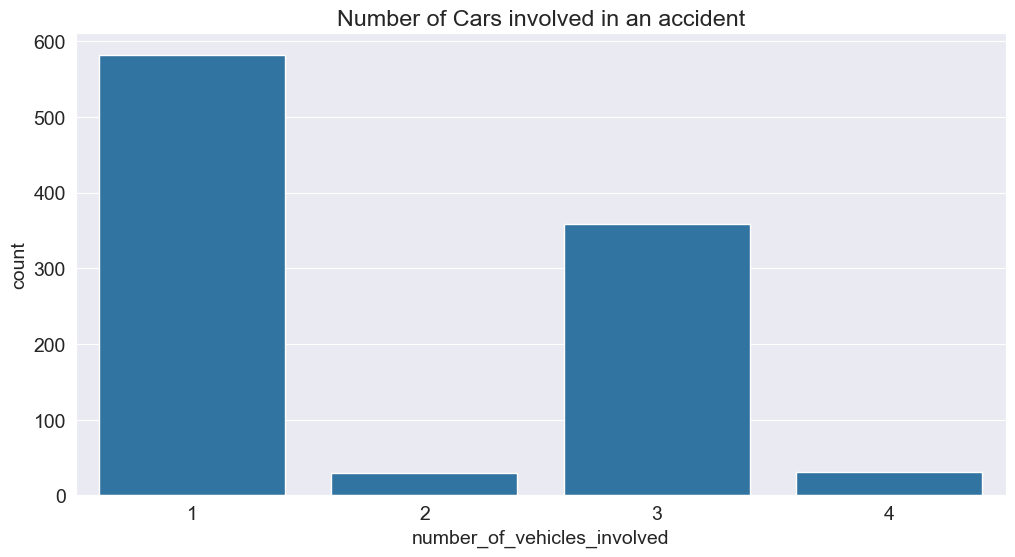

In [420]:
plt.figure(figsize=(12,6))
plt.title('Number of Cars involved in an accident')
sns.barplot(x=No_of_vehicles_involved.index, y=No_of_vehicles_involved);

In [421]:
#Relationship between the car model and the severity of claims on the Insurer?

insurance_claims.groupby('auto_model')[['total_claim_amount']].mean().sort_values('total_claim_amount', ascending = False).rename(columns = {'total_claim_amount' : 'mean_claim_amount'})

,mean_claim_amount
auto_model,
X6,66480.625000
Escape,63865.000000
C300,61640.000000
RSX,60902.500000
ML350,59545.500000
Forrestor,59542.500000
Fusion,57632.857143
CRV,56960.500000
RAM,56920.930233


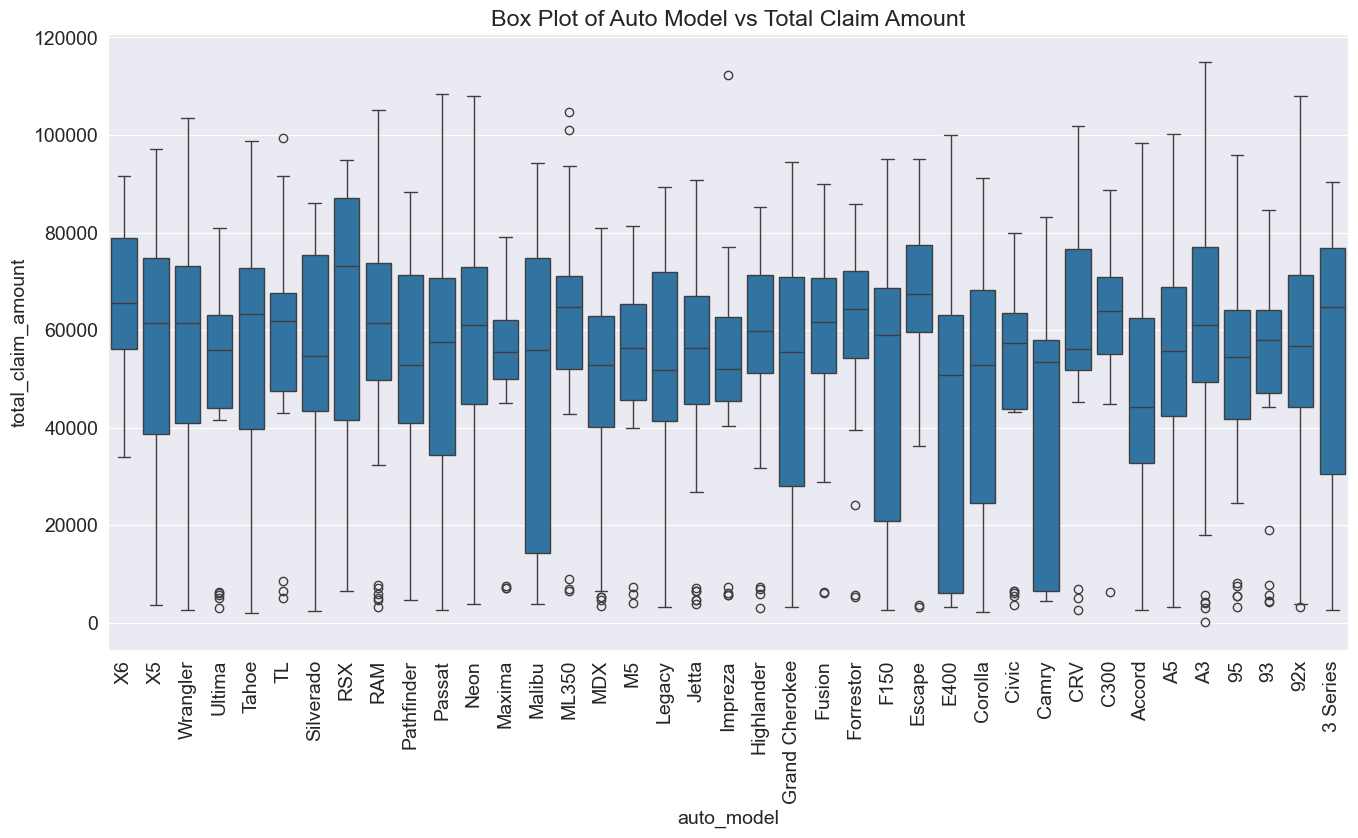

In [422]:
plt.figure(figsize=(16, 8))

my_order = insurance_claims.groupby(by=["auto_model"])["total_claim_amount"].median().iloc[::-1].index

sns.boxplot(x = 'auto_model', y = 'total_claim_amount' ,data = insurance_claims, order = my_order).set(title = 'Box Plot of Auto Model vs Total Claim Amount')
plt.xticks(rotation = 90);

In [423]:
#State with the most severe value of claim incidences?

State_claims = insurance_claims.groupby('incident_state')[['total_claim_amount']].sum().sort_values('total_claim_amount', ascending = False)
State_claims

,total_claim_amount
incident_state,
NY,14773770
SC,13538150
WV,10897150
VA,5499770
NC,5421230
PA,1487150
OH,1144720


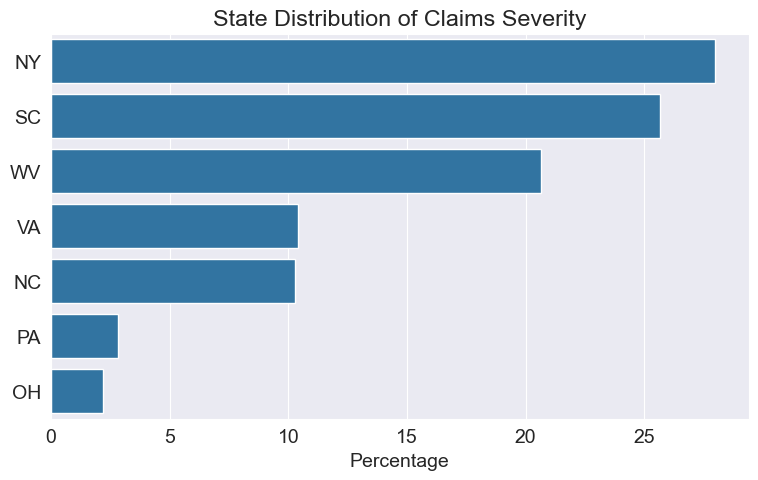

In [424]:
State_claims_pct = State_claims.total_claim_amount * 100/ State_claims.total_claim_amount.sum()

sns.barplot(x=State_claims_pct, y=State_claims_pct.index)

plt.title('State Distribution of Claims Severity')
plt.ylabel(None);
plt.xlabel('Percentage');

In [425]:
#Preparing Data for Training

In [426]:
#Input and Target Columns

insurance_claims.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_bind_year',
       'policy_bind_month', 'policy_bind_day', 'policy_bind_week_of_year',
       'incident_year', 'incident_month', 'incident_day',
       'incident_week_of_y

In [427]:
insurance_claims.shape

(1000, 48)

In [428]:
input_cols = ['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_bind_year',
       'policy_bind_month', 'policy_bind_day', 'policy_bind_week_of_year',
       'incident_year', 'incident_month', 'incident_day',
       'incident_week_of_year', 'incident_time']
       
       
target_col = ['total_claim_amount']

In [429]:
inputs = insurance_claims[input_cols].copy()
targets = insurance_claims[target_col].copy()

In [430]:
#Identify numeric and categorical columns

In [431]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [432]:
inputs.shape, targets.shape

((1000, 44), (1000, 1))

In [433]:
numeric_cols = inputs.select_dtypes(include=np.number).columns.tolist()
len(numeric_cols)

23

In [434]:
categorical_cols = (inputs.select_dtypes(include=['object', 'datetime64[ns]']).columns.tolist())
len(categorical_cols)

21

In [435]:
len(input_cols) == len(numeric_cols) + len(categorical_cols)

True

In [436]:
#Scale numeric and categorical columns¶

In [437]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

In [438]:
#One Hot Encode Categorical columns

In [439]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])

C:\Users\Ashrit\AppData\Local\Temp\ipykernel_8484\286254480.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
C:\Users\Ashrit\AppData\Local\Temp\ipykernel_8484\286254480.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
C:\Users\Ashrit\AppData\Local\Temp\ipykernel_8484\286254480.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

In [440]:
inputs.shape

(1000, 2202)

In [441]:
inputs.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,...,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported_N,fraud_reported_Y
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.425791,0.443289,0.495681,2002-02-08 04:40:47.999999872,0.424000,0.509878,0.191000,0.372583,0.250011,0.758833,...,0.01200,0.022000,0.02000,0.024000,0.023000,0.04200,0.023000,0.016000,0.753000,0.247000
min,0.000000,0.000000,0.000000,1990-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.241649,0.288889,0.261705,1995-09-19 00:00:00,0.000000,0.406550,0.090909,0.095885,0.000000,0.536454,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,0.416493,0.422222,0.481100,2002-04-01 12:00:00,0.333333,0.510370,0.090909,0.190411,0.000000,0.790729,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,0.576722,0.555556,0.732554,2008-04-21 12:00:00,1.000000,0.608554,0.090909,0.907203,0.507711,1.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,2015-02-22 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
std,0.240320,0.203117,0.286061,NaN,0.407910,0.151257,0.208855,0.375680,0.277335,0.252962,...,0.10894,0.146757,0.14007,0.153126,0.149978,0.20069,0.149978,0.125538,0.431483,0.431483


In [442]:
#Create training test and validation sets

In [443]:
#Create training group (with train and validation sets) and test sets
train_inputs, test_inputs, train_targets_g, test_targets = train_test_split(
    inputs[numeric_cols + encoded_cols], targets, test_size=0.1, random_state=42)

In [444]:
len(train_inputs), len(test_inputs), len( inputs[numeric_cols + encoded_cols])

(900, 100, 1000)

In [445]:
len(train_targets_g), len(targets),len(test_targets)

(900, 1000, 100)

In [446]:
#Gradient Boosting
#To train gradient boosting model

In [447]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [448]:
%%time
model.fit(train_inputs, train_targets_g)

CPU times: total: 3.09 s
Wall time: 526 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=20,
             n_jobs=-1, num_parallel_tree=None, ...)

In [449]:
#Prediction

In [450]:
preds = model.predict(train_inputs)
preds

array([64169.984 , 58422.53  , 60307.504 , 62040.31  ,  6438.051 ,
       61423.227 , 56605.633 ,  6078.288 ,  4963.979 , 65353.305 ,
       68657.305 , 68130.195 , 62044.68  , 59253.605 , 62331.715 ,
       59071.47  , 62140.84  , 71639.52  , 60567.12  , 60567.12  ,
        7120.245 , 60823.793 , 62621.312 ,  7714.762 , 68451.62  ,
       58422.53  , 64574.414 , 68074.16  , 57037.016 , 60806.035 ,
       63697.62  ,  7444.438 ,  5691.538 , 62140.84  , 65342.08  ,
       64340.22  , 66860.29  , 60567.12  , 66675.08  , 55586.855 ,
       61344.227 , 68615.836 ,  5730.882 ,  5754.095 ,  8633.253 ,
       64511.164 , 65442.836 ,  5399.1675, 66042.805 , 62309.65  ,
       59004.723 , 64822.37  , 58422.53  , 70078.9   , 62272.66  ,
       63447.043 , 66617.17  , 62175.047 , 63291.727 , 62610.395 ,
       62708.12  , 59712.98  , 66614.47  , 66520.29  , 63588.67  ,
       60396.9   ,  7120.245 , 64412.69  , 73855.63  , 68796.09  ,
       66225.1   , 74703.9   , 66416.32  , 60399.273 , 67281.7

In [451]:
preds.shape

(900,)

In [452]:
#Evaluate predictions using RMSE error

In [453]:
def rmse(a, b):
    return np.sqrt(mean_squared_error(a, b))

In [454]:
rmse(preds, train_targets_g)

np.float64(11446.310497273784)

In [455]:
#Insurance Claims Prediction

In [456]:
insurance_claims

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_week_of_year,incident_year,incident_month,incident_day,incident_week_of_year,incident_time
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,Y,2014,10,17,42,2015,1,25,4,3
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Y,2006,6,27,26,2015,1,21,4,103
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,N,2000,9,6,36,2015,2,22,8,173
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Y,1990,5,25,21,2015,1,10,2,296
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,N,2014,6,6,23,2015,2,17,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,N,1991,7,16,29,2015,2,22,8,283
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,N,2014,1,5,1,2015,1,24,4,12
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,N,2003,2,17,8,2015,1,23,4,143
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,N,2011,11,18,46,2015,2,26,9,39


In [457]:
insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [458]:
#Rows the dataset have
num_rows = len(insurance_claims)
num_rows

1000

In [459]:
#Columns the dataset have
num_cols = len(insurance_claims.columns)
num_cols

48

In [460]:
#column titles of the input variables
input_cols = ['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_bind_year',
       'policy_bind_month', 'policy_bind_day', 'policy_bind_week_of_year',
       'incident_year', 'incident_month', 'incident_day',
       'incident_week_of_year', 'incident_time']
       
       
output_cols = ['total_claim_amount']

In [461]:
ins_inputs = insurance_claims[input_cols].copy()
ins_outputs = insurance_claims[output_cols].copy()
ins_inputs.shape, ins_outputs.shape

((1000, 44), (1000, 1))

In [462]:
categorical_cols = (ins_inputs.select_dtypes(include=['object', 'datetime64[ns]']).columns.tolist())
len(categorical_cols)

21

Minimum Claims 100.0000, Maximum Claims 114920.0000, Average Claims 52761.9400


C:\Users\Ashrit\AppData\Local\Temp\ipykernel_8484\2939258332.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_claims.total_claim_amount,kde = True)


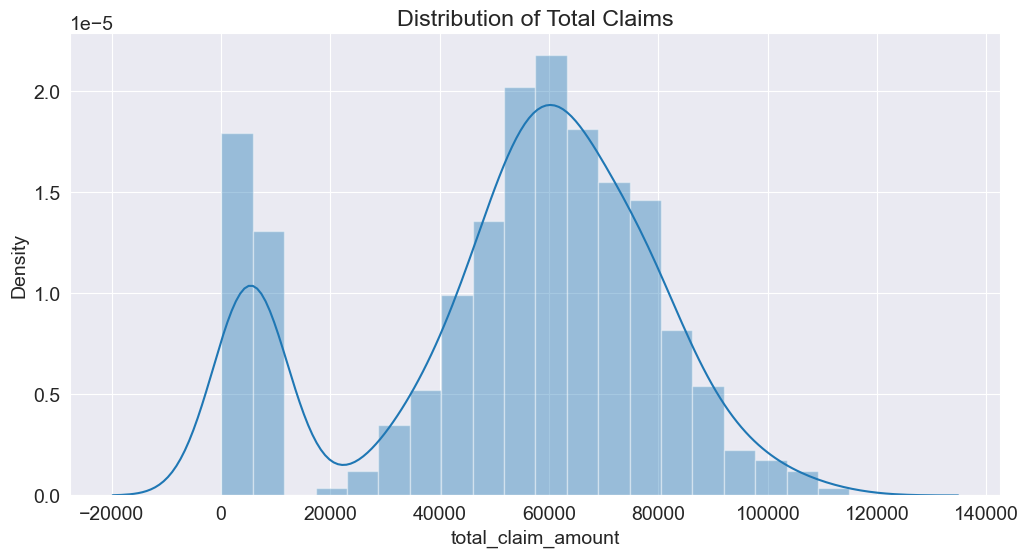

In [463]:
# minimum, maximum and average value of the charges column? Show the distribution of values in a graph
rcParams['figure.figsize'] = 12, 6
minim = insurance_claims.total_claim_amount.min()
maxim = insurance_claims.total_claim_amount.max()
avg = insurance_claims.total_claim_amount.mean()

print('Minimum Claims {:.4f}, Maximum Claims {:.4f}, Average Claims {:.4f}'.format(minim, maxim,avg))

# Distribution
sns.distplot(insurance_claims.total_claim_amount,kde = True)
plt.title('Distribution of Total Claims');

In [464]:
#Preparing dataset for training

In [465]:
def insurance_claims_to_arrays(insurance_claims):
  # Make a copy of the original dataframe
  insurance_claims1 = insurance_claims.copy(deep = True)
  # Convert non-numeric categorical columns into numbers
  for col in categorical_cols:
    insurance_claims1[col] = insurance_claims1[col].astype('category').cat.codes
  # Extract inputs and outputs as arrays
  inputs_array = insurance_claims1[input_cols].to_numpy().astype('float32')
  targets_array = insurance_claims1[output_cols].to_numpy().astype('float32')
  return inputs_array,targets_array

In [466]:
inputs_array, targets_array = insurance_claims_to_arrays(insurance_claims)
inputs_array.shape, targets_array.shape

((1000, 44), (1000, 1))

In [467]:
inputs_array

array([[3.28000e+02, 4.80000e+01, 5.21585e+05, ..., 2.50000e+01,
        4.00000e+00, 3.00000e+00],
       [2.28000e+02, 4.20000e+01, 3.42868e+05, ..., 2.10000e+01,
        4.00000e+00, 1.03000e+02],
       [1.34000e+02, 2.90000e+01, 6.87698e+05, ..., 2.20000e+01,
        8.00000e+00, 1.73000e+02],
       ...,
       [1.30000e+02, 3.40000e+01, 9.18516e+05, ..., 2.30000e+01,
        4.00000e+00, 1.43000e+02],
       [4.58000e+02, 6.20000e+01, 5.33940e+05, ..., 2.60000e+01,
        9.00000e+00, 3.90000e+01],
       [4.56000e+02, 6.00000e+01, 5.56080e+05, ..., 2.60000e+01,
        9.00000e+00, 2.19000e+02]], shape=(1000, 44), dtype=float32)

In [468]:
inputs_t = torch.from_numpy(inputs_array).type(torch.float32)
targets_t = torch.from_numpy(targets_array).type(torch.float32)
inputs_t.dtype, targets_t.dtype

(torch.float32, torch.float32)

In [469]:
dataset = TensorDataset(inputs_t, targets_t)

In [470]:
# Split test from training group i.e. validation + test
test_percent = 0.125 # between 0.1 and 0.2
test_size = int(num_rows * test_percent)
train_g_size = num_rows - test_size

train_g_ds, test_ds = random_split(dataset, [train_g_size, test_size]) # Use the random_split function to split dataset into 2 parts of the desired length

In [471]:
train_g_size

875

In [472]:
# Split validation and test sets from training group

val_percent = 0.1 # between 0.1 and 0.2
val_size = int(train_g_size * val_percent)
train_size = train_g_size - val_size

train_ds, val_ds = random_split(train_g_ds, [train_size, val_size]) # Use the random_split function to split dataset into 2 parts of the desired length

In [473]:
train_size, val_size

(788, 87)

In [474]:
batch_size = 32

In [475]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)
test_loader = DataLoader(test_ds, batch_size)

In [476]:
for xb, yb in train_loader:
  print('inputs:', xb)
  print('targets:', yb)
  break

inputs: tensor([[2.1100e+02, 3.7000e+01, 4.8309e+05,  ..., 3.0000e+01, 5.0000e+00,
         4.8000e+01],
        [2.9700e+02, 4.8000e+01, 7.5161e+05,  ..., 2.5000e+01, 4.0000e+00,
         6.7000e+01],
        [2.8900e+02, 4.6000e+01, 8.5806e+05,  ..., 2.8000e+01, 9.0000e+00,
         1.2900e+02],
        ...,
        [1.2700e+02, 3.1000e+01, 8.5615e+05,  ..., 1.3000e+01, 3.0000e+00,
         1.5000e+02],
        [8.0000e+00, 2.1000e+01, 3.5508e+05,  ..., 5.0000e+00, 6.0000e+00,
         2.8000e+01],
        [2.5300e+02, 4.1000e+01, 2.2840e+05,  ..., 1.1000e+01, 2.0000e+00,
         1.2900e+02]])
targets: tensor([[53460.],
        [51480.],
        [56430.],
        [78120.],
        [44640.],
        [51000.],
        [41520.],
        [ 5220.],
        [72200.],
        [43280.],
        [75790.],
        [74400.],
        [ 9020.],
        [ 5490.],
        [ 3740.],
        [36400.],
        [55000.],
        [74200.],
        [44110.],
        [69930.],
        [56000.],
        [

In [477]:
#Creating a Linear Regression Model

In [478]:
input_size = len(input_cols)
output_size = len(output_cols)

In [479]:
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)                 
        
    def forward(self, xb):
        out = self.linear(xb)                      
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out, targets)                          
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out, targets)                              
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [480]:
model = InsuranceModel()

In [481]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1198, -0.1427, -0.1412, -0.0758, -0.0092,  0.0437,  0.0798,  0.1376,
          -0.0676,  0.0399,  0.1357, -0.0975,  0.0330,  0.0525, -0.0270, -0.1457,
          -0.0582, -0.0827, -0.0332,  0.0881,  0.0870, -0.1054, -0.1477, -0.0894,
           0.0238,  0.0288, -0.0159,  0.0706,  0.0070, -0.0091,  0.1129, -0.0939,
           0.1335,  0.0640, -0.1074,  0.0891, -0.0251, -0.1397,  0.0071, -0.0929,
          -0.0933,  0.1037,  0.0164, -0.0514]], requires_grad=True),
 Parameter containing:
 tensor([-0.0548], requires_grad=True)]

In [482]:
#Training the model to fit the data

In [483]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [484]:
result = evaluate(model, val_loader) 
print(result)

{'val_loss': 185809.5625}


In [485]:
epochs = 180
lr = 1e-7
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 47641.7305
Epoch [40], val_loss: 90273.9453
Epoch [60], val_loss: 78180.4297
Epoch [80], val_loss: 94922.5938
Epoch [100], val_loss: 27163.1660
Epoch [120], val_loss: 133388.2812
Epoch [140], val_loss: 101932.4922
Epoch [160], val_loss: 91166.5234
Epoch [180], val_loss: 98068.5391


In [486]:
epochs = 200
lr = 1e-8
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 25359.6152
Epoch [40], val_loss: 25132.9434
Epoch [60], val_loss: 23760.6035
Epoch [80], val_loss: 28949.5625
Epoch [100], val_loss: 35821.7695
Epoch [120], val_loss: 23555.4355
Epoch [140], val_loss: 26007.2598
Epoch [160], val_loss: 23297.9238
Epoch [180], val_loss: 25205.1172
Epoch [200], val_loss: 24748.8184


In [487]:
epochs = 200
lr = 1e-9
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 23118.6660
Epoch [40], val_loss: 23116.0781
Epoch [60], val_loss: 23402.7812
Epoch [80], val_loss: 23341.7676
Epoch [100], val_loss: 23722.4863
Epoch [120], val_loss: 23140.3906
Epoch [140], val_loss: 23408.3828
Epoch [160], val_loss: 23348.3906
Epoch [180], val_loss: 23995.6562
Epoch [200], val_loss: 23252.1582


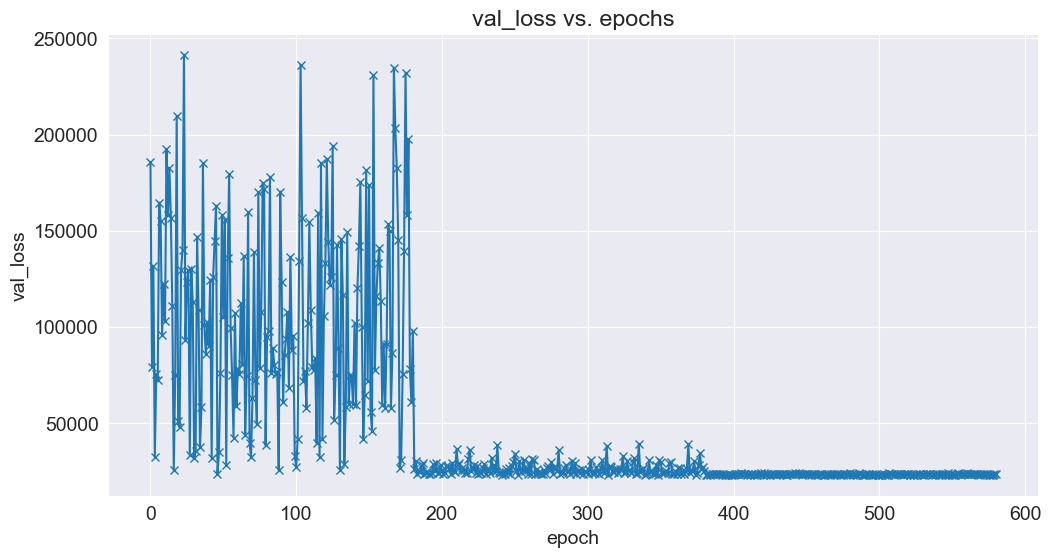

In [488]:
losses = [r['val_loss'] for r in [result] + history1 + history2 + history3]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');

In [489]:
val_loss = 20203.4688

In [490]:
#Make predictions using the trained model

In [491]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)              
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [492]:
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([8.9000e+01, 3.2000e+01, 5.1546e+05, 2.8700e+02, 1.0000e+00, 1.0000e+00,
        1.0000e+03, 9.8893e+02, 0.0000e+00, 6.1419e+05, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 9.0000e+00, 4.0000e+00, 2.7600e+04, 0.0000e+00, 2.2000e+01,
        2.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0400e+02, 1.1000e+01, 1.0000e+00, 0.0000e+00, 2.0000e+00, 3.0000e+00,
        2.0000e+00, 4.0000e+00, 2.7000e+01, 1.9990e+03, 0.0000e+00, 1.9960e+03,
        1.2000e+01, 1.8000e+01, 5.1000e+01, 2.0150e+03, 1.0000e+00, 2.3000e+01,
        4.0000e+00, 2.1700e+02])
Target: tensor([84590.])
Prediction: tensor([66182.6172])


In [493]:
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([ 2.3500e+02,  3.9000e+01,  6.5186e+05,  8.0600e+02,  0.0000e+00,
         0.0000e+00,  5.0000e+02,  1.0466e+03,  4.0000e+06,  4.3498e+05,
         1.0000e+00,  4.0000e+00,  1.2000e+01,  8.0000e+00,  5.0000e+00,
         0.0000e+00, -3.1700e+04,  2.3000e+01,  3.0000e+00,  0.0000e+00,
         3.0000e+00, -1.0000e+00,  1.0000e+00,  2.0000e+00,  5.7600e+02,
         1.0000e+00,  1.0000e+00,  0.0000e+00,  2.0000e+00,  1.0000e+00,
         1.0000e+00,  3.0000e+00,  3.2000e+01,  2.0100e+03,  0.0000e+00,
         2.0110e+03,  1.0000e+00,  7.0000e+00,  1.0000e+00,  2.0150e+03,
         1.0000e+00,  2.4000e+01,  4.0000e+00,  4.8000e+01])
Target: tensor([4950.])
Prediction: tensor([50216.6250])


In [494]:
result_test = evaluate(model, test_loader)
result_test

{'val_loss': 22769.23046875}

In [495]:
#Feed Forward Neural Networks on a GPU with PyTorch

In [496]:
hidden_size = 128

In [497]:
class InsuranceModelF(nn.Module):
    def __init__(self,input_size, hidden_size, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.linear2 = nn.Linear(hidden_size, output_size)  

        
    def forward(self, xb):
        out = self.linear1(xb) 
        out = F.relu(out)
        out = self.linear2(out)                   
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calculate loss
        loss = F.l1_loss(out, targets)                          
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out, targets)                            
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result):
      if (epoch+1) % 20 == 0:
        print("Epoch [{}], val_loss: {:.4f}".format(epoch + 1, result['val_loss']))

In [498]:
model = InsuranceModelF(input_size = input_size, hidden_size = hidden_size, output_size = output_size)
model

InsuranceModelF(
  (linear1): Linear(in_features=44, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=1, bias=True)
)

In [499]:
for inputs, targets in train_loader:
  out = model(inputs)
  loss = F.l1_loss(out, targets)                          
  print(loss)
  break

tensor(63730.6875, grad_fn=<MeanBackward0>)


In [500]:
for inputs, targets in train_loader:
    print('inputs.shape:', inputs.shape)
    break

input_size = inputs.shape[-1]
input_size

inputs.shape: torch.Size([32, 44])


44

In [501]:
for t in model.parameters():
    print(t.shape)

torch.Size([128, 44])
torch.Size([128])
torch.Size([1, 128])
torch.Size([1])


In [502]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.cuda.is_available()

False

In [503]:
def get_default_device():
    if torch.cuda.is_available:
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [504]:
device = get_default_device()
device

device(type='cuda')

In [505]:
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking = True)

In [506]:
for inputs, targets in train_loader:
    print(inputs.shape)
    break

torch.Size([32, 44])


In [507]:
class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)
            
    def __len__(self):
        return len(self.dl)

In [508]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [509]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [510]:
model = InsuranceModelF(input_size = input_size, hidden_size=hidden_size, output_size = output_size)
to_device(model, device)

AssertionError: Torch not compiled with CUDA enabled

In [ ]:
history = [evaluate(model, val_loader)]
history

In [ ]:
history += fit(200, 1e-11, model, train_loader, val_loader)

In [ ]:
history += fit(200, 1e-11, model, train_loader, val_loader)

In [ ]:
history += fit(200, 1e-10, model, train_loader, val_loader)

In [ ]:
history += fit(200, 1e-10, model, train_loader, val_loader)

In [ ]:
history += fit(400, 1e-10, model, train_loader, val_loader)

In [ ]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs No. of Epochs');

In [ ]:
Feed_forward_val_loss = 20573.5781